# L03.1 Linear Regression Practice

In [2]:
import torch

x = torch.tensor([[1, 2, 3],[4, 5, 6], [7, 8, 9]])
print(x.type())
print(x)

torch.LongTensor
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


In [3]:
print(x.size())
print(x.shape)
print(x.ndimension())

torch.Size([3, 3])
torch.Size([3, 3])
2


In [4]:
y = torch.FloatTensor([[[1, 2], [3, 4]], [[5, 6], [7, 8]], [[1, 2], [3, 4]]])
print(y.shape)
print(y.ndimension()) # == len(y.shape)

torch.Size([3, 2, 2])
3


In [5]:
print(y)
print("origianl shape: ", y.shape)

y0 =y.unsqueeze(0)
print(y0)
print("unsqueeze(0): ", y0.shape)

tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]],

        [[1., 2.],
         [3., 4.]]])
origianl shape:  torch.Size([3, 2, 2])
tensor([[[[1., 2.],
          [3., 4.]],

         [[5., 6.],
          [7., 8.]],

         [[1., 2.],
          [3., 4.]]]])
unsqueeze(0):  torch.Size([1, 3, 2, 2])


In [6]:
x = torch.FloatTensor([[[1, 2], [3, 4]], [[5, 6], [7, 8]], [[1, 2], [3, 4]]])

x0 = x.unsqueeze(0) # [3, 2, 2] --> [1, 3, 2, 2]
x1 = x.unsqueeze(1) # [3, 2, 2] --> [3, 1, 2, 2]
x2 = x.unsqueeze(2) # [3, 2, 2] --> [3, 2, 1, 2]
x3 = x.unsqueeze(3) # [3, 2, 2] --> [3, 2, 2, 1]

print(x0)
print(x1)
print(x2)
print(x3)

tensor([[[[1., 2.],
          [3., 4.]],

         [[5., 6.],
          [7., 8.]],

         [[1., 2.],
          [3., 4.]]]])
tensor([[[[1., 2.],
          [3., 4.]]],


        [[[5., 6.],
          [7., 8.]]],


        [[[1., 2.],
          [3., 4.]]]])
tensor([[[[1., 2.]],

         [[3., 4.]]],


        [[[5., 6.]],

         [[7., 8.]]],


        [[[1., 2.]],

         [[3., 4.]]]])
tensor([[[[1.],
          [2.]],

         [[3.],
          [4.]]],


        [[[5.],
          [6.]],

         [[7.],
          [8.]]],


        [[[1.],
          [2.]],

         [[3.],
          [4.]]]])


In [7]:
xt = x.unsqueeze(0).unsqueeze(1).unsqueeze(0).unsqueeze(5) # 1, 1, 1, 3, 2, 1, 2
print(xt.squeeze().shape)

torch.Size([3, 2, 2])


In [10]:
x.view(3, -1)

tensor([[1., 2., 3., 4.],
        [5., 6., 7., 8.],
        [1., 2., 3., 4.]])

In [14]:
x = torch.FloatTensor([[1, 2], [3, 4], [5, 6]]) # 3 x 2
w = torch.rand(1, 2, dtype=torch.float)  # 2 x 1
b = torch.rand(3, 1, dtype=torch.float)

print(x @ w.T + b)

tensor([[1.3625],
        [3.6637],
        [5.3913]])


In [16]:
w = torch.tensor(4.0, requires_grad=True)
a = w*3
l = a**2
l.backward()
print(w.grad)

tensor(72.)


## Linear Regression 실습

In [24]:
import torch

x_train = torch.FloatTensor([[1, 2], [3, 2], [3, 7], [1, 1], [1, 0]])
y_train = torch.FloatTensor([[4], [8], [23], [1], [-2]])

W = torch.randn(2, 1)
b = torch.randn(1, 1)
print(W, b)

lr = 0.01

for epoch in range(3001):
    W.requires_grad_(True)
    b.requires_grad_(True)

    h = x_train @ W + b
    cost = ((y_train - h)**2).mean()

    cost.backward()

    with torch.no_grad():
        W = W - lr * W.grad
        b = b - lr * b.grad

        if epoch % 100 == 0:
            print(f'Epoch {epoch}: Cost = {cost.item()}, W = {W.squeeze().tolist()}, b = {b.squeeze().item()}')


tensor([[0.0461],
        [0.3764]]) tensor([[-0.7001]])
Epoch 0: Cost = 103.51225280761719, W = [0.4062841236591339, 1.061174750328064], b = -0.5697934627532959
Epoch 100: Cost = 1.123466968536377, W = [0.7995666265487671, 3.149756908416748], b = -1.7464873790740967
Epoch 200: Cost = 0.5601152181625366, W = [1.0648976564407349, 3.1616039276123047], b = -2.436006784439087
Epoch 300: Cost = 0.28763169050216675, W = [1.3211987018585205, 3.1219964027404785], b = -2.884639024734497
Epoch 400: Cost = 0.14781615138053894, W = [1.5124239921569824, 3.088153123855591], b = -3.201080322265625
Epoch 500: Cost = 0.07596535980701447, W = [1.6503573656082153, 3.0632741451263428], b = -3.427344799041748
Epoch 600: Cost = 0.03904002904891968, W = [1.749335527420044, 3.0453691482543945], b = -3.5894830226898193
Epoch 700: Cost = 0.02006339095532894, W = [1.82030189037323, 3.032525062561035], b = -3.7057085037231445
Epoch 800: Cost = 0.010310955345630646, W = [1.8711775541305542, 3.0233170986175537], b 

In [26]:
x_test = torch.FloatTensor([[5, 10], [2, 7], [3, 10]])

y_test = x_test @ W + b
print(y_test)

tensor([[35.9999],
        [21.0001],
        [32.0000]])


## Linear Regression with Scikit-learn

In [27]:
from sklearn.linear_model import LinearRegression

x = [[1, 2], [3, 2], [3 ,7], [1, 1], [1, 0]]
y = [[4], [8], [23], [1], [-2]]

lr = LinearRegression() # 모델 생성
lr.fit(x, y) # 학습 (피팅)

print(lr.coef_, lr.intercept_)

[[2. 3.]] [-4.]


In [29]:
x_test = [[5, 10], [2, 7], [10, 3]]
y_test = lr.predict(x_test)
print(y_test)

[[36.]
 [21.]
 [25.]]


# L04.1 Logistic Regression Practice

In [33]:
import torch

x_train = torch.FloatTensor([[1], [2], [3], [4], [5], [2.5], [3.5], [0], [3.1], [2.7], [2.8], [2.9]])
y_train = torch.FloatTensor([[1],[1],[1],[0],[0],[0],[0],[1],[0],[1],[1],[1]])

In [42]:
import math

w = torch.randn(1, 1)
b = torch.randn(1, 1)

lr = 1.0

for epoch in range(2001):
    w.requires_grad_(True)
    b.requires_grad_(True)

    h = torch.sigmoid(x_train @ w + b)
    #h = 1 / (1 + math.e ** (-(x_train @ w + b)))

    cost = torch.mean(-y_train * torch.log(h) - (1-y_train) * torch.log(1-h))  # BCE

    cost.backward()

    with torch.no_grad():
        w = w - lr * w.grad
        b = b - lr * b.grad

        if epoch % 100 == 0:
            print(f'Epoch {epoch}: Cost = {cost.item()}, W = {w.squeeze().tolist()}, b = {b.squeeze().item()}')

Epoch 0: Cost = 0.8727443814277649, W = -0.413744181394577, b = -0.28808581829071045
Epoch 100: Cost = 0.42096149921417236, W = -1.4398301839828491, b = 4.371669292449951
Epoch 200: Cost = 0.39894402027130127, W = -1.8920661211013794, b = 5.754400730133057
Epoch 300: Cost = 0.39091920852661133, W = -2.170053005218506, b = 6.59665584564209
Epoch 400: Cost = 0.3870604336261749, W = -2.3642303943634033, b = 7.182271480560303
Epoch 500: Cost = 0.3849537670612335, W = -2.508277177810669, b = 7.615475177764893
Epoch 600: Cost = 0.3837165832519531, W = -2.618950128555298, b = 7.947679042816162
Epoch 700: Cost = 0.3829547166824341, W = -2.7059473991394043, b = 8.20846176147461
Epoch 800: Cost = 0.3824699819087982, W = -2.775430917739868, b = 8.416533470153809
Epoch 900: Cost = 0.3821541965007782, W = -2.8315742015838623, b = 8.584529876708984
Epoch 1000: Cost = 0.38194456696510315, W = -2.8773388862609863, b = 8.721386909484863
Epoch 1100: Cost = 0.3818035423755646, W = -2.914893865585327, b =

In [43]:
bce = torch.nn.BCELoss()

w = torch.randn(1, 1)
b = torch.randn(1, 1)

lr = 1.0

for epoch in range(2001):
    w.requires_grad_(True)
    b.requires_grad_(True)

    h = torch.sigmoid(x_train @ w + b)

    cost = bce(h, y_train)
    cost.backward()

    with torch.no_grad():
        w = w - lr * w.grad
        b = b - lr * b.grad

        if epoch % 100 == 0:
            print(f'Epoch {epoch}: Cost = {cost.item()}, W = {w.squeeze().tolist()}, b = {b.squeeze().item()}')

Epoch 0: Cost = 1.4393614530563354, W = 0.16764813661575317, b = 0.08368638157844543
Epoch 100: Cost = 0.42043960094451904, W = -1.44786536693573, b = 4.396467208862305
Epoch 200: Cost = 0.3987874984741211, W = -1.8965394496917725, b = 5.767995357513428
Epoch 300: Cost = 0.3908498287200928, W = -2.173051357269287, b = 6.605713844299316
Epoch 400: Cost = 0.38702407479286194, W = -2.3664066791534424, b = 7.188823699951172
Epoch 500: Cost = 0.3849329650402069, W = -2.5099260807037354, b = 7.620428562164307
Epoch 600: Cost = 0.3837040364742279, W = -2.620234727859497, b = 7.951530933380127
Epoch 700: Cost = 0.3829468786716461, W = -2.7069664001464844, b = 8.21151351928711
Epoch 800: Cost = 0.3824649155139923, W = -2.7762486934661865, b = 8.418981552124023
Epoch 900: Cost = 0.382150799036026, W = -2.8322389125823975, b = 8.586517333984375
Epoch 1000: Cost = 0.38194236159324646, W = -2.8778820037841797, b = 8.723010063171387
Epoch 1100: Cost = 0.3818020820617676, W = -2.915339469909668, b = 

In [ ]:
x_test = torch.FloatTensor([[4.5],[1.1]])

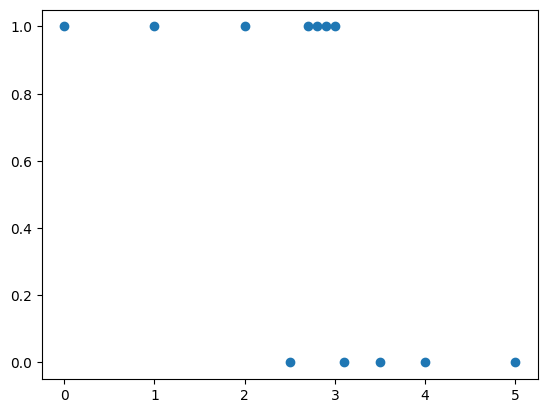

In [34]:
import matplotlib.pyplot as plt

plt.scatter(x_train, y_train)
plt.show()